In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#Load in the data
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#Check for any missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#Taking an indepth look at all the object types and thier values
df.drop('CarName', axis = 1, inplace = True)

In [8]:
df['carbody'] = df['carbody'].replace(['wagon', 'hardtop', 'convertible'], 'Other')
df['drivewheel'] = df['drivewheel'].replace(['rwd', '4wd'], 'wd')
df['enginetype'] = df['enginetype'].replace(['ohcf', 'ohcv', 'l', 'dohc', 'rotor', 'dohcv'], 'Other')
df['fuelsystem'] = df['fuelsystem'].replace(['idi', '1bbl', 'spdi', '4bbl', 'mfi', 'spfi'], 'Other')
df['cylindernumber'] = df['cylindernumber'].replace(['five', 'eight', 'two', 'twelve', 'three'], 'Other')

In [9]:
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ':' + str(df[col].unique()))
        print(df[col].value_counts())
        print('__'*35)

fueltype:['gas' 'diesel']
gas       185
diesel     20
Name: fueltype, dtype: int64
______________________________________________________________________
aspiration:['std' 'turbo']
std      168
turbo     37
Name: aspiration, dtype: int64
______________________________________________________________________
doornumber:['two' 'four']
four    115
two      90
Name: doornumber, dtype: int64
______________________________________________________________________
carbody:['Other' 'hatchback' 'sedan']
sedan        96
hatchback    70
Other        39
Name: carbody, dtype: int64
______________________________________________________________________
drivewheel:['wd' 'fwd']
fwd    120
wd      85
Name: drivewheel, dtype: int64
______________________________________________________________________
enginelocation:['front' 'rear']
front    202
rear       3
Name: enginelocation, dtype: int64
______________________________________________________________________
enginetype:['Other' 'ohc']
ohc      148
Ot

In [10]:
df['CurbBand'] = pd.cut(df['curbweight'], 5)
df[['CurbBand', 'price']].groupby(['CurbBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,CurbBand,price
4,"(3550.4, 4066.0]",35472.000000
3,"(3034.8, 3550.4]",19817.637265
2,"(2519.2, 3034.8]",15903.395833
1,"(2003.6, 2519.2]",9195.204819
0,"(1485.422, 2003.6]",6519.774194


In [11]:
df['WheelBand'] = pd.cut(df['wheelbase'], 4)
df[['WheelBand', 'price']].groupby(['WheelBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,WheelBand,price
3,"(112.325, 120.9]",26068.222222
2,"(103.75, 112.325]",20061.000000
1,"(95.175, 103.75]",12370.959123
0,"(86.566, 95.175]",9566.000000


In [12]:
df['HeightBand'] = pd.cut(df['carheight'], 4)
df[['HeightBand', 'price']].groupby(['HeightBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,HeightBand,price
2,"(53.8, 56.8]",14566.638298
3,"(56.8, 59.8]",13018.000000
0,"(47.788, 50.8]",12313.782051
1,"(50.8, 53.8]",11915.087576


In [13]:
df['LengthBand'] = pd.cut(df['carlength'], 3)
df[['LengthBand', 'price']].groupby(['LengthBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,LengthBand,price
2,"(185.767, 208.1]",21782.978723
1,"(163.433, 185.767]",11938.228653
0,"(141.033, 163.433]",6848.648649


In [14]:
df['WidthBand'] = pd.cut(df['carwidth'], 6)
df[['WidthBand', 'price']].groupby(['WidthBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,WidthBand,price
5,"(70.3, 72.3]",31998.681818
4,"(68.3, 70.3]",20223.800000
3,"(66.3, 68.3]",15380.329717
2,"(64.3, 66.3]",11802.942029
1,"(62.3, 64.3]",7568.947368
0,"(60.288, 62.3]",5968.000000


In [15]:
df['EngineBand'] = pd.cut(df['enginesize'], 5)
df[['EngineBand', 'price']].groupby(['EngineBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,EngineBand,price
4,"(273.0, 326.0]",40786.666667
3,"(220.0, 273.0]",34260.000000
2,"(167.0, 220.0]",24949.547619
1,"(114.0, 167.0]",14409.015355
0,"(60.735, 114.0]",8349.504950


In [16]:
df['BoreBand'] = pd.cut(df['boreratio'],3)
df[['BoreBand', 'price']].groupby(['BoreBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,BoreBand,price
2,"(3.473, 3.94]",18864.546154
1,"(3.007, 3.473]",11349.839034
0,"(2.539, 3.007]",7286.913043


In [17]:
df['StrokeBand'] = pd.cut(df['stroke'],2)
df[['StrokeBand', 'price']].groupby(['StrokeBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,StrokeBand,price
0,"(2.068, 3.12]",13587.881818
1,"(3.12, 4.17]",13162.614447


In [18]:
df['CompressionBand'] = pd.cut(df['compressionratio'],2)
df[['CompressionBand', 'price']].groupby(['CompressionBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,CompressionBand,price
1,"(15.0, 23.0]",15838.1500
0,"(6.984, 15.0]",12999.7982


In [19]:
df['PowerBand'] = pd.cut(df['horsepower'],3)
df[['PowerBand', 'price']].groupby(['PowerBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,PowerBand,price
2,"(208.0, 288.0]",33700.250000
1,"(128.0, 208.0]",22739.104175
0,"(47.76, 128.0]",10704.055215


In [20]:
df['RPMBand'] = pd.cut(df['peakrpm'],4)
df[['RPMBand', 'price']].groupby(['RPMBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,RPMBand,price
0,"(4147.55, 4762.5]",19530.531250
2,"(5375.0, 5987.5]",14342.575274
1,"(4762.5, 5375.0]",11014.900000
3,"(5987.5, 6600.0]",9638.090909


In [21]:
df['CityBand'] = pd.cut(df['citympg'],2)
df[['CityBand', 'price']].groupby(['CityBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,CityBand,price
0,"(12.964, 31.0]",13937.818842
1,"(31.0, 49.0]",7484.142857


In [22]:
df['HighwayBand'] = pd.cut(df['highwaympg'],2)
df[['HighwayBand', 'price']].groupby(['HighwayBand'], as_index=False).mean().sort_values(by='price', ascending=False)

,HighwayBand,price
0,"(15.962, 35.0]",15246.07576
1,"(35.0, 54.0]",7330.00000


In [23]:
df.drop(columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'], inplace = True)

In [24]:
label = LabelEncoder()
for col in df.columns:
    df[col] = label.fit_transform(df[col])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,price,...,LengthBand,WidthBand,EngineBand,BoreBand,StrokeBand,CompressionBand,PowerBand,RPMBand,CityBand,HighwayBand
0,0,5,1,0,1,0,1,0,0,118,...,1,1,1,1,0,0,0,1,0,0
1,1,5,1,0,1,0,1,0,0,137,...,1,1,1,1,0,0,0,1,0,0
2,2,3,1,0,1,1,1,0,0,137,...,1,2,1,0,1,0,1,1,0,0
3,3,4,1,0,0,2,0,0,1,123,...,1,2,0,1,1,0,0,2,0,0
4,4,4,1,0,0,2,1,0,1,148,...,1,3,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,1,1,0,0,2,1,0,1,143,...,2,4,1,2,1,0,0,2,0,0
201,201,1,1,1,0,2,1,0,1,161,...,2,4,1,2,1,0,1,1,0,0
202,202,1,1,0,0,2,1,0,0,165,...,2,4,2,2,0,0,1,2,0,0
203,203,1,0,1,0,2,1,0,1,167,...,2,4,1,1,1,1,0,1,0,0


<AxesSubplot:>

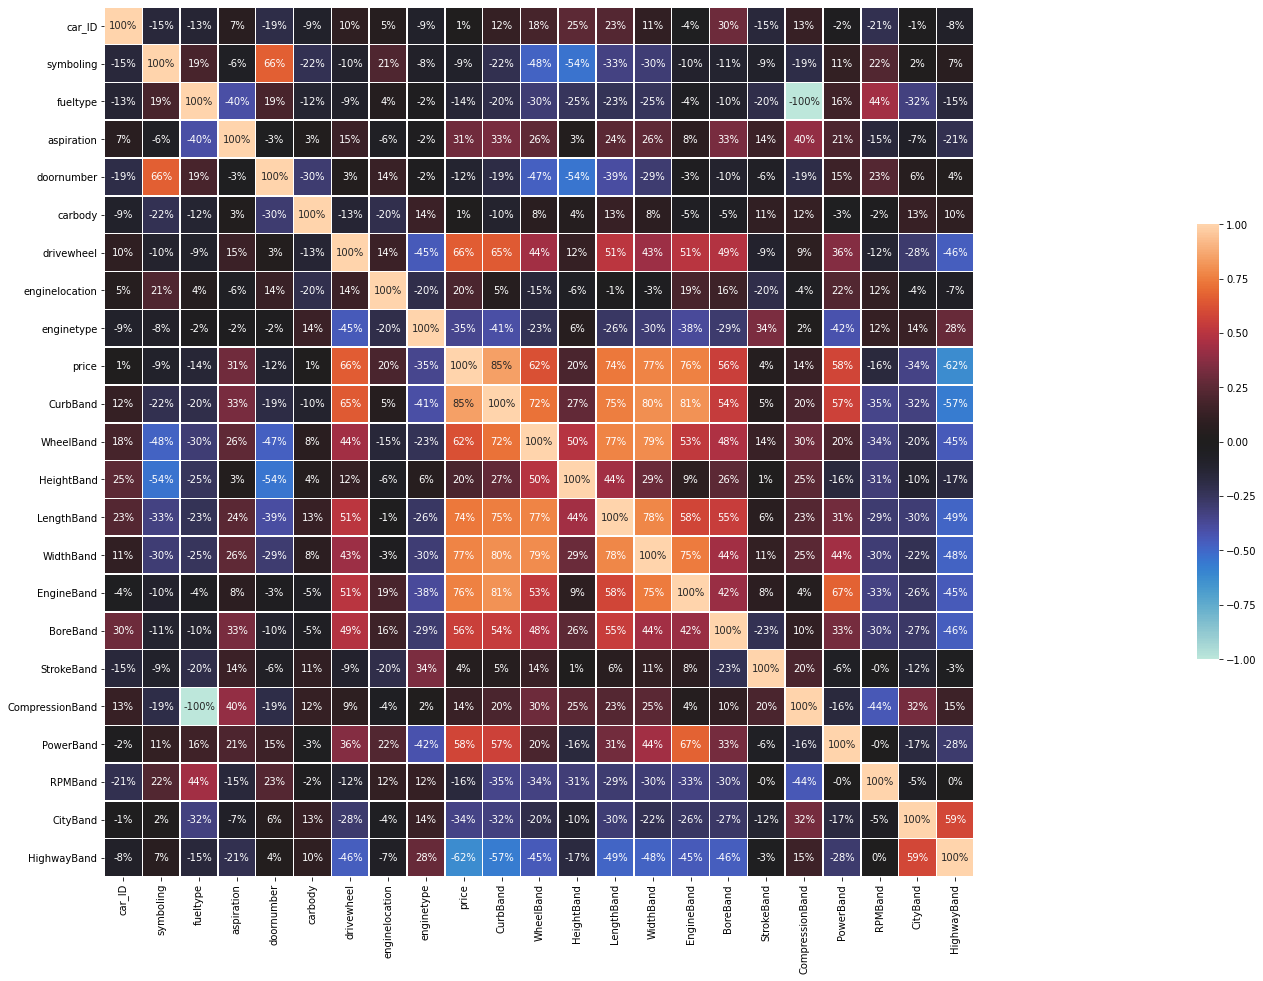

In [25]:
corr = df.corr()
plt.figure(figsize=(80, 16))
sns.heatmap(corr, vmax = 1, center = 0, square = True, linewidth = 0.5, cbar_kws = {'shrink':0.5}, annot = True, fmt = '.0%')

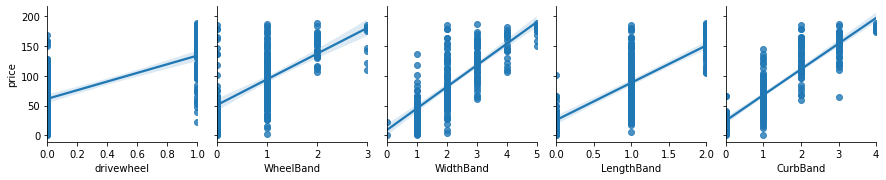

In [26]:
sns.pairplot(data = df, 
             x_vars = ['drivewheel', 'WheelBand', 'WidthBand', 'LengthBand', 'CurbBand'], 
             y_vars = ['price'], kind = 'reg')

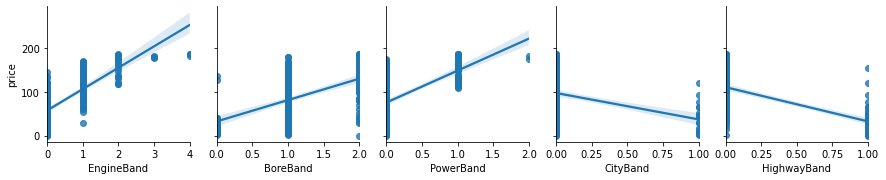

In [27]:
sns.pairplot(data = df, x_vars = ['EngineBand', 'BoreBand', 'PowerBand', 'CityBand', 'HighwayBand'], 
             y_vars = ['price'], kind = 'reg')

In [28]:
X = df.drop('price', axis = 1)
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [29]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.8912255804208423
0.7837033260350633


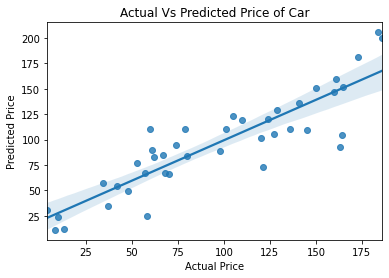

In [30]:
sns.regplot(data = df, x = Y_test, y = Y_predict)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Price of Car")

plt.show()

In [31]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'price',
       'CurbBand', 'WheelBand', 'HeightBand', 'LengthBand', 'WidthBand',
       'EngineBand', 'BoreBand', 'StrokeBand', 'CompressionBand', 'PowerBand',
       'RPMBand', 'CityBand', 'HighwayBand'],
      dtype='object')

In [32]:
x = df[['drivewheel', 'aspiration', 'CurbBand', 'WheelBand', 'LengthBand', 'HeightBand', 'WidthBand', 'EngineBand', 'BoreBand', 'CompressionBand', 'PowerBand', 'CityBand', 'HighwayBand']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8316527121987329
0.8277719877778396


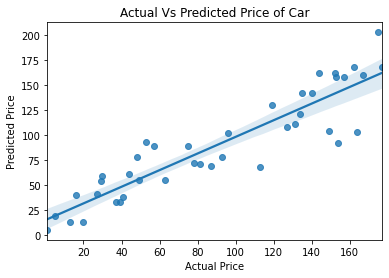

In [34]:
sns.regplot(data = df, x = y_test, y = y_predict)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Price of Car")

plt.show()